In [1]:
%matplotlib inline
import math
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_lon = pandas.read_csv('Data/data_longitude.csv').values
data_lat = pandas.read_csv('Data/data_latitude.csv').values
data_sst = pandas.read_csv('Data/data_sst.csv').values
print(data_sst.shape)

lon_min = np.min(data_lon)
lon_max = np.max(data_lon)
lat_min = np.min(data_lat)
lat_max = np.max(data_lat)
print(lon_min, lon_max)
print(lat_min, lat_max)

(2029, 1024)
67.413651 85.716797
6.7816138 26.612522


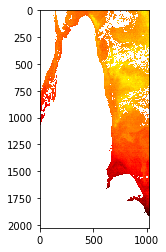

In [3]:
plt.imshow(data_sst, cmap='hot', interpolation='nearest')
plt.show()

In [15]:
#Useful Variables
res = 0.1
lon_min = math.floor(lon_min/res)*res
lon_max = math.ceil(lon_max/res)*res
lat_min = math.floor(lat_min/res)*res
lat_max = math.ceil(lat_max/res)*res
print(lon_min, lon_max)
print(lat_min, lat_max)

lon_div = round((lon_max - lon_min)/res)
lat_div = round((lat_max - lat_min)/res)
print(lon_div, lat_div)

67.4 85.80000000000001
6.7 26.700000000000003
184 200


In [16]:
# Create Empty Bins
sst_bin_sum = np.zeros((lat_div, lon_div))
sst_bin_count = np.zeros((lat_div, lon_div))

# Add it to bins
rows, cols = data_sst.shape
for i in range(rows):
    for j in range(cols):
        # find the nearest bin, i.e the index of the bin
        lon_bin = round(math.floor((data_lon[i, j] - lon_min) / res))
        lat_bin = round(math.floor((data_lat[i, j] - lat_min) / res))
        # Append the SST to that bin
        if np.isnan(data_sst[i, j]) == False:
            sst_bin_sum[lat_bin, lon_bin] += data_sst[i, j]
            sst_bin_count[lat_bin, lon_bin] += 1
print("Done Adding to bins")

Done Adding to bins


In [17]:
# Calculate the average of every bin
lat_bin = np.empty((lat_div, lon_div))
lon_bin = np.empty((lat_div, lon_div))
sst_bin_avg = np.empty((lat_div, lon_div))
sst_bin_avg[:] = np.nan
for i in range(lat_div):
    for j in range(lon_div):
        lat_bin[i, j] = i*res + lat_min
        lon_bin[i, j] = j*res + lon_min
        if sst_bin_count[i,j] > 0:
            sst_bin_avg[i,j] = sst_bin_sum[i,j] / sst_bin_count[i,j]
print("Done calculating mean")

Done calculating mean


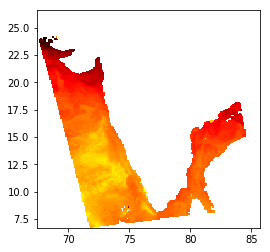

In [24]:
plt.pcolor(lon_bin, lat_bin, sst_bin_avg, cmap='hot')
plt.figure(1).set_size_inches(4,4)
plt.show()